In [1]:
import pandas as pd
import numpy as np

In [2]:
b1 = pd.read_pickle("D:\Documents\Codes\VisualStudioProjects\DATASETS\cifar-10\cifar-10-batches-py\data_batch_1")

In [3]:
print(b1.keys())

dict_keys(['batch_label', 'labels', 'data', 'filenames'])


In [4]:
print(b1['data'])

[[ 59  43  50 ... 140  84  72]
 [154 126 105 ... 139 142 144]
 [255 253 253 ...  83  83  84]
 ...
 [ 71  60  74 ...  68  69  68]
 [250 254 211 ... 215 255 254]
 [ 62  61  60 ... 130 130 131]]


In [12]:
data1 = pd.DataFrame(b1['data'])

In [6]:
data1.shape

(10000, 3072)

In [7]:
b2 = pd.read_pickle("D:\Documents\Codes\VisualStudioProjects\DATASETS\cifar-10\cifar-10-batches-py\data_batch_2")
b3 = pd.read_pickle("D:\Documents\Codes\VisualStudioProjects\DATASETS\cifar-10\cifar-10-batches-py\data_batch_3")
b4 = pd.read_pickle("D:\Documents\Codes\VisualStudioProjects\DATASETS\cifar-10\cifar-10-batches-py\data_batch_4")
b5 = pd.read_pickle("D:\Documents\Codes\VisualStudioProjects\DATASETS\cifar-10\cifar-10-batches-py\data_batch_5")

In [8]:
data2 = pd.DataFrame(b2['data'])
data3 = pd.DataFrame(b3['data'])
data4 = pd.DataFrame(b4['data'])
data5 = pd.DataFrame(b5['data'])

In [10]:
print(type(data2))

<class 'pandas.core.frame.DataFrame'>


In [13]:
xtrain = pd.concat([data1, data2, data3, data4, data5])

In [14]:
xtrain.shape

(40000, 3072)

In [18]:
y1 = pd.DataFrame(b1['labels'])
y2 = pd.DataFrame(b2['labels'])
y3 = pd.DataFrame(b3['labels'])
y4 = pd.DataFrame(b4['labels'])
y5 = pd.DataFrame(b5['labels'])

In [19]:
ytrain = pd.concat([y1,y2,y3,y4,y5])

In [20]:
ytrain.shape

(40000, 1)

In [21]:
ytrain.head()

,0
0,6
1,9
2,9
3,4
4,1


# FFN

In [23]:
XTRAIN = xtrain.values
YTRAIN = ytrain.values

In [24]:
XTRAIN =XTRAIN.astype('float32')/255.0

In [25]:
from keras.layers import Dense, Flatten, Dropout, Conv1D, MaxPooling1D, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras import losses
from keras.optimizers import SGD, Adam
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [26]:
model = Sequential()
model.add(Dense(1024, input_shape=(3072, ), activation='sigmoid'))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [28]:
sgd = SGD(learning_rate=0.01)
epochs = 7
model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
H = model.fit(xtrain, ytrain, epochs=epochs, batch_size=64)

Epoch 1/7
625/625 [==============================] - 9s 14ms/step - loss: 2.2718 - accuracy: 0.1555
Epoch 2/7
625/625 [==============================] - 8s 13ms/step - loss: 2.1958 - accuracy: 0.2191
Epoch 3/7
625/625 [==============================] - 9s 14ms/step - loss: 2.1194 - accuracy: 0.2507
Epoch 4/7
625/625 [==============================] - 10s 17ms/step - loss: 2.0583 - accuracy: 0.2741
Epoch 5/7
625/625 [==============================] - 9s 14ms/step - loss: 2.0130 - accuracy: 0.2887
Epoch 6/7
625/625 [==============================] - 10s 16ms/step - loss: 1.9777 - accuracy: 0.2994
Epoch 7/7
625/625 [==============================] - 10s 16ms/step - loss: 1.9510 - accuracy: 0.3102


Text(0.5, 0, 'epochs')

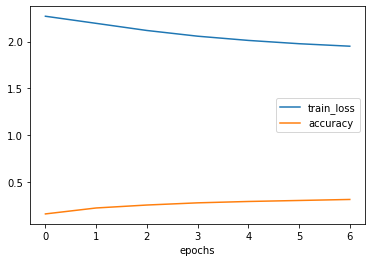

In [29]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.arange(0,epochs), H.history['loss'], label='train_loss')
plt.plot(np.arange(0,epochs), H.history['accuracy'], label='accuracy')
plt.legend()
plt.xlabel('epochs')